In [1]:
white.test <- function(lmod,data){
    u2 <- lmod$residuals^2
    y <- fitted(lmod)
    Ru2 <- summary(lm(u2 ~ y + I(y^2)))$r.squared
    LM <- nrow(data)*Ru2
    p.value <- 1-pchisq(LM, 2)
    data.frame("Test statistic"=LM,"P value"=p.value)
}

In [46]:
library(readxl)
library(Hmisc)
library(pander)
library(car)
library(het.test)

Loading required package: vars
Loading required package: MASS
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: urca
Loading required package: lmtest


***

# Aggiungo Dataset

***

In [9]:
data_path = "/Volumes/HDD_Ale/Statistical Modelling/datasets/companies-1.xls"
data <- read_excel(data_path)

In [10]:
head(data)

company,assets,sales,mark_val,profits,cash,employ,sector
Air Products,2687,1870,1890,145.7,352.2,18.2,Other
American Savings Bank FSB,3614,367,90,14.1,24.6,1.1,Finance
AMR,6425,6131,2448,345.8,682.5,49.5,Transportation
Apple Computer,1022,1754,1370,72.0,119.5,4.8,HiTech
Armstrong World Industries,1093,1679,1070,100.9,164.5,20.8,Manufacturing
Bally Manufacturing,1529,1295,444,25.6,137.0,19.4,Other


In [13]:
var_numeric <- c('assets', 'sales', 'mark_val', 'profits', 'cash', 'employ')

***

# Analisi Descrittiva

***

In [17]:
summary(data[var_numeric])

     assets          sales           mark_val         profits       
 Min.   :  223   Min.   : 176.0   Min.   :  53.0   Min.   :-208.40  
 1st Qu.: 1075   1st Qu.: 653.2   1st Qu.: 440.5   1st Qu.:  37.20  
 Median : 2140   Median :1501.5   Median : 829.0   Median :  64.30  
 Mean   : 2997   Mean   :2006.5   Mean   :1036.7   Mean   :  86.01  
 3rd Qu.: 3976   3rd Qu.:2698.0   3rd Qu.:1182.5   3rd Qu.: 124.00  
 Max.   :12505   Max.   :6615.0   Max.   :3940.0   Max.   : 345.80  
      cash             employ       
 Min.   :-108.10   Min.   :  0.600  
 1st Qu.:  69.03   1st Qu.:  3.475  
 Median : 119.25   Median :  8.100  
 Mean   : 169.96   Mean   : 18.859  
 3rd Qu.: 228.38   3rd Qu.: 23.775  
 Max.   : 682.50   Max.   :118.100  

In [18]:
cor(data[var_numeric])

,assets,sales,mark_val,profits,cash,employ
assets,1.0000000,0.1772699,0.2441519,0.2830843,0.3036877,0.1105166
sales,0.1772699,1.0000000,0.5974219,0.3172530,0.5630487,0.8634541
mark_val,0.2441519,0.5974219,1.0000000,0.6986348,0.8354449,0.5873249
profits,0.2830843,0.3172530,0.6986348,1.0000000,0.8556017,0.3252593
cash,0.3036877,0.5630487,0.8354449,0.8556017,1.0000000,0.4920105
employ,0.1105166,0.8634541,0.5873249,0.3252593,0.4920105,1.0000000


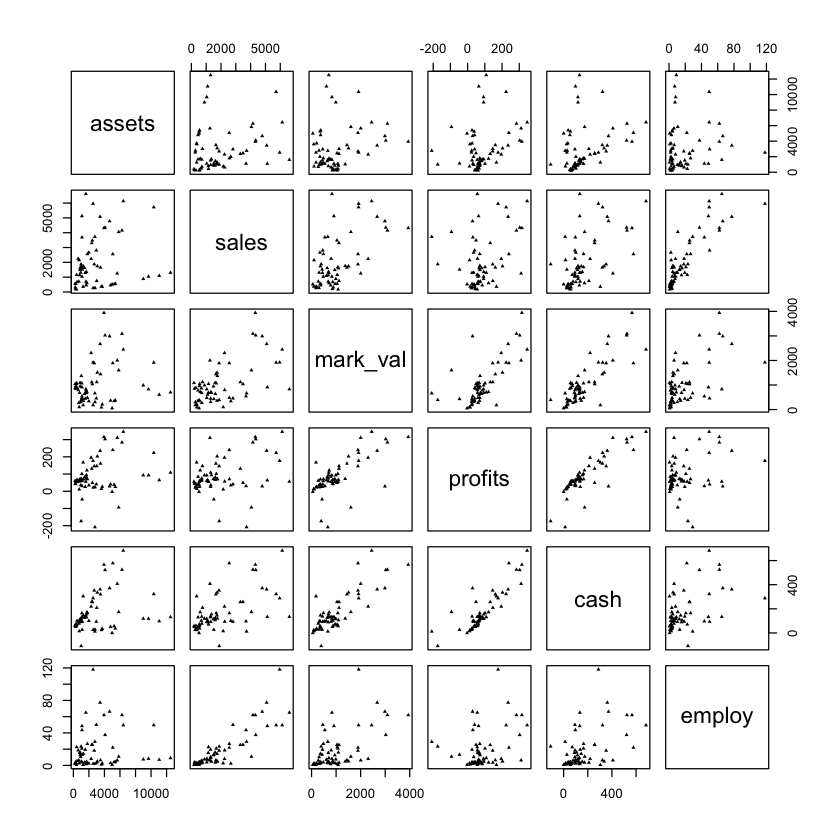

In [25]:
plot(data[var_numeric], pch = 17, cex=.5)

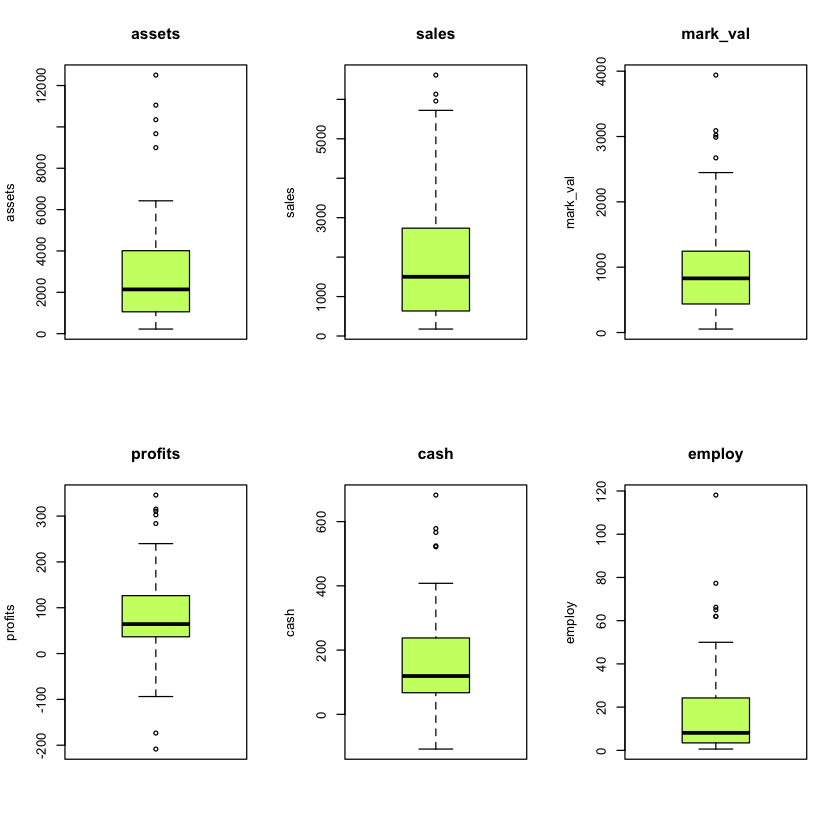

In [31]:
par(mfrow = c(2,3))
for(i in var_numeric){
    boxplot(data[i], main = i, col='darkolivegreen1', ylab = i)
}

***

# Statistica Inferenziale

***

In [33]:
mod1 <- lm(mark_val ~ assets + sales + profits + cash + employ, data)
summary(mod1)


Call:
lm(formula = mark_val ~ assets + sales + profits + cash + employ, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1228.23  -222.80   -50.87   251.70  1180.29 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.438e+02  1.030e+02   2.367   0.0213 *  
assets       2.066e-04  2.127e-02   0.010   0.9923    
sales       -1.802e-02  7.445e-02  -0.242   0.8096    
profits      8.828e-02  1.176e+00   0.075   0.9404    
cash         3.787e+00  8.620e-01   4.393 4.82e-05 ***
employ       9.399e+00  4.875e+00   1.928   0.0587 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 444.8 on 58 degrees of freedom
Multiple R-squared:  0.7394,	Adjusted R-squared:  0.7169 
F-statistic: 32.91 on 5 and 58 DF,  p-value: 9.393e-16


In [34]:
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
assets,1,2624579.5,2624579.5,13.265783,5.779531e-04
sales,1,13958763.6,13958763.6,70.553749,1.314695e-11
profits,1,11824615.9,11824615.9,59.766825,1.732254e-10
cash,1,3410595.5,3410595.5,17.238654,1.094569e-04
employ,1,735471.9,735471.9,3.717399,5.874871e-02
Residuals,58,11475056.9,197845.8,NA,NA


In [35]:
white.test(mod1, data)

Test.statistic,P.value
9.406023,0.009067927


In [47]:
dwtest(mod1)


	Durbin-Watson test

data:  mod1
DW = 2.0641, p-value = 0.5685
alternative hypothesis: true autocorrelation is greater than 0


# Plot dei residui 

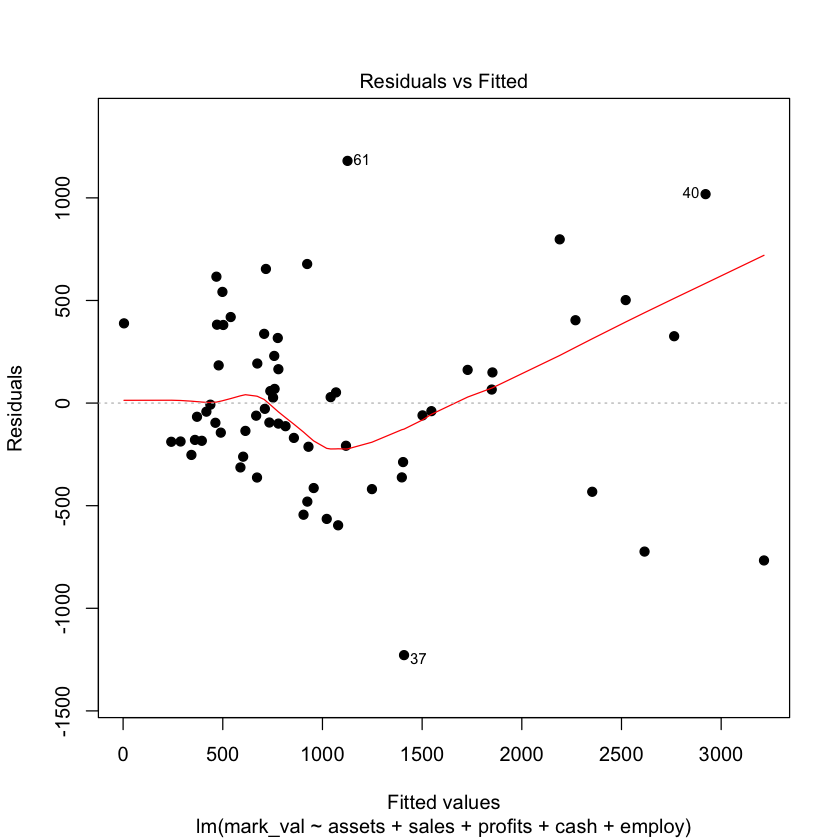

In [55]:
plot(mod1,which=1,pch=19)

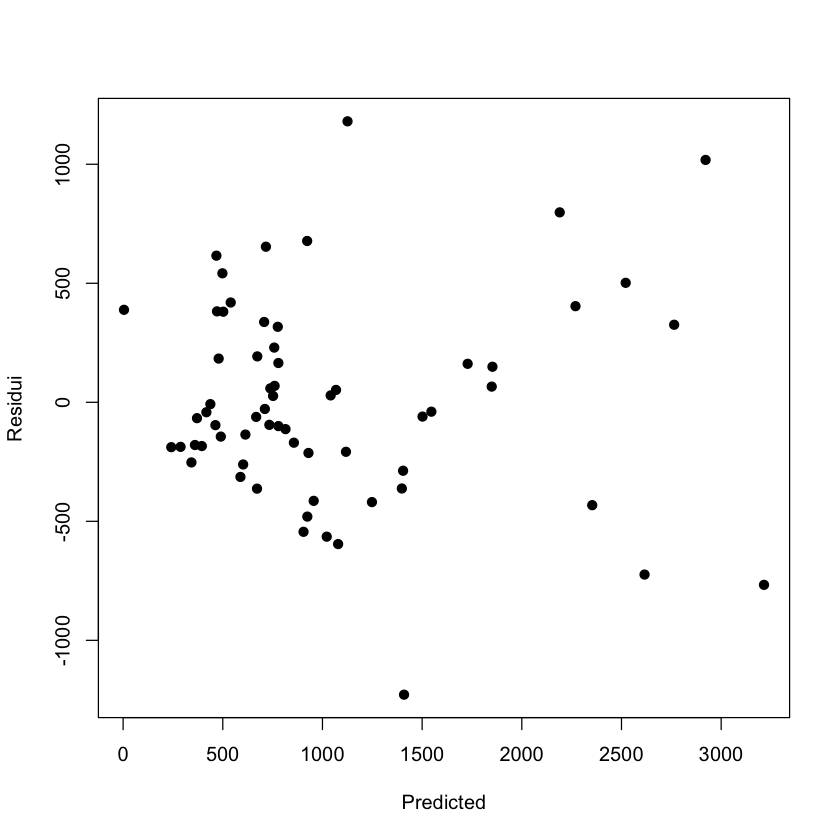

In [54]:

plot(fitted(mod1), resid(mod1), pch=19, xlab = 'Predicted', ylab = 'Residui' )

# Plot studenti r-studentizzati

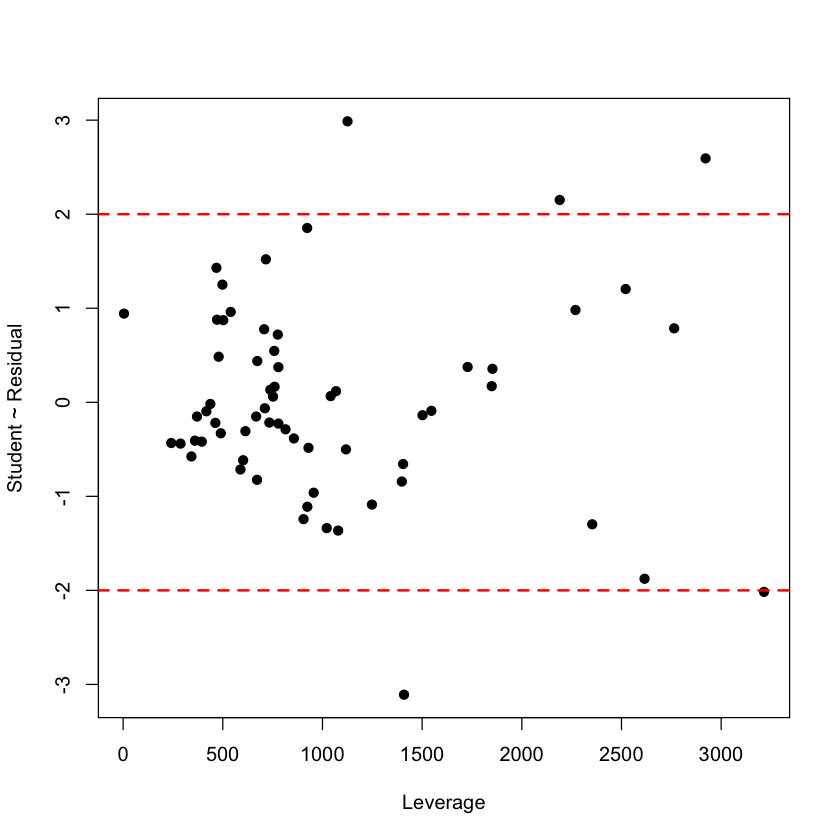

In [65]:
plot(fitted(mod1), rstudent(mod1), xlab='Leverage', ylab='Student ~ Residual', pch=19)
abline(h=2, col = 'red', lwd=2, lty=2)
abline(h=-2, col = 'red', lwd=2, lty=2)

# Plot rstudentizzati rispetto alla leverage

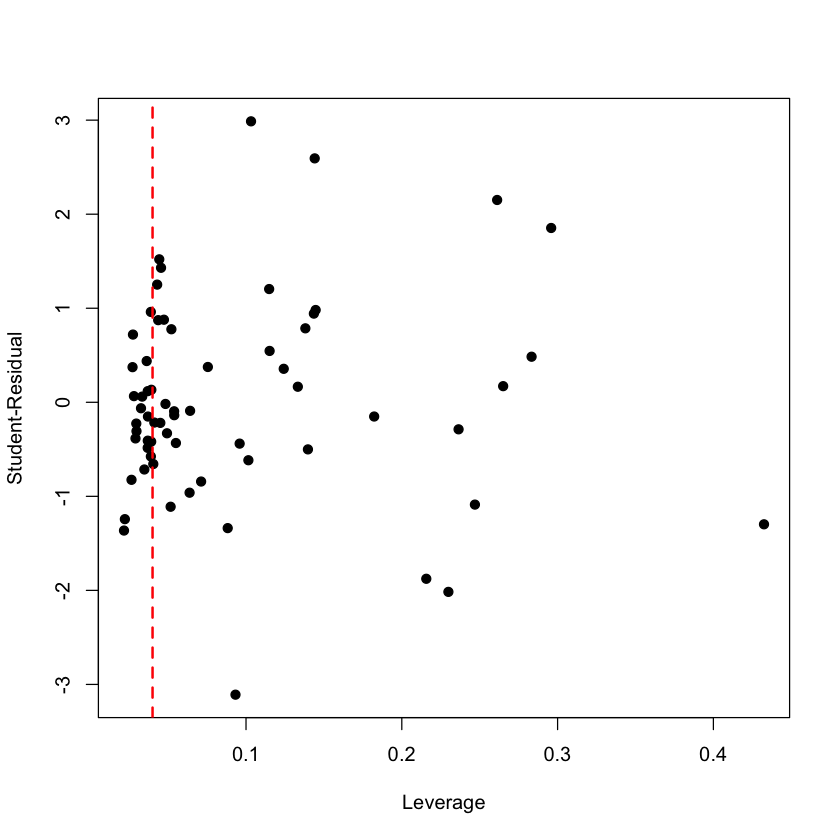

In [72]:
plot(hatvalues(mod1), rstudent(mod1), pch=19, xlab="Leverage", ylab = "Student-Residual")
abline(v = 0.04, col=2, lwd=2, lty=2)

# Grafico di Cooks

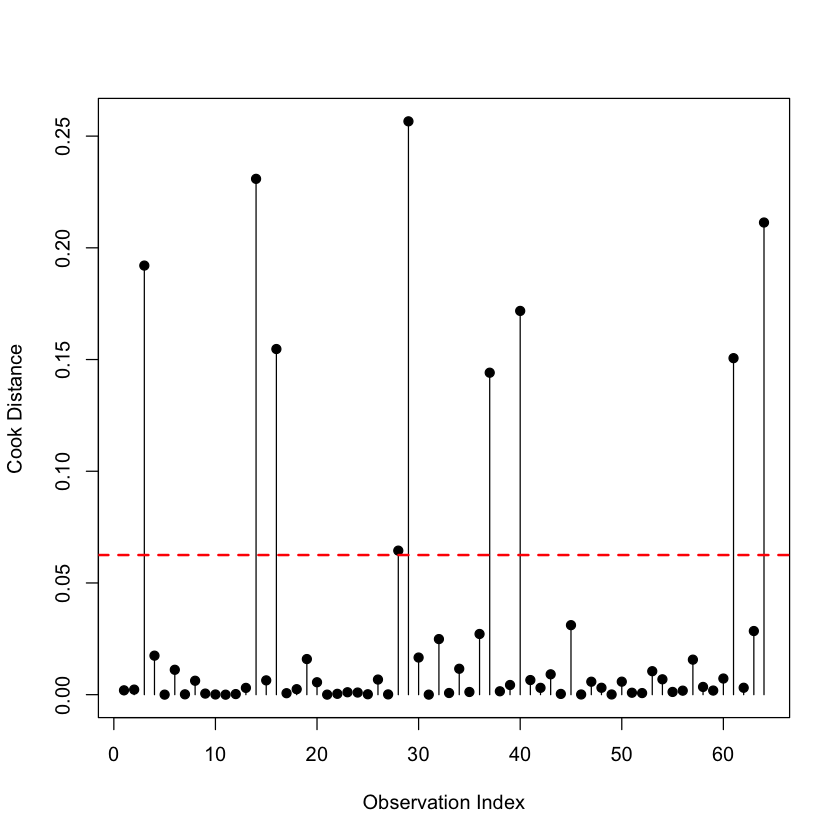

In [70]:
plot(cooks.distance(mod1), pch=19, xlab="Observation Index", ylab="Cook Distance", type="h")
points(cooks.distance(mod1), pch=19)
abline(h=4/nrow(data), col=2, lty=2, lwd=2)

In [ ]:
plot(mod1,which=4,pch=19)
abline(h=2*4/nrow(data),col=2,lwd=3,lty=2)

 # Q-Q PLOT

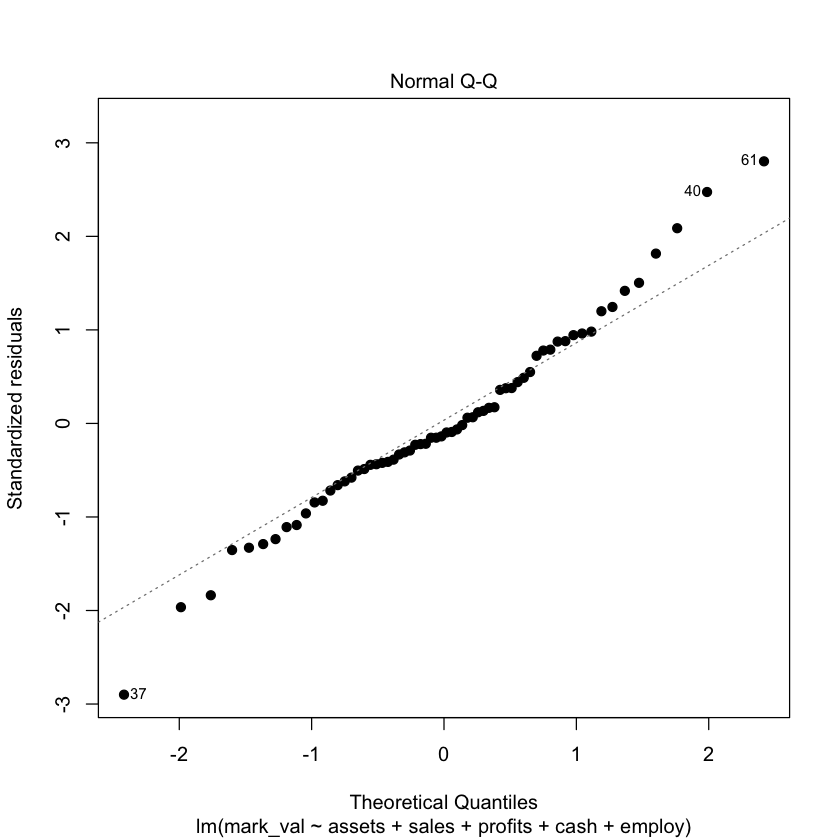

In [73]:
plot(mod1,which=2,pch=19)